In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error  
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
#import data and split
peptide = pd.read_excel(r'imput.xlsx',sheet_name='Sheet1')
print (peptide)
X=peptide.drop(['Activity'], axis=1)
y=peptide['Activity']

     AAC_A  AAC_C  AAC_D  AAC_E  AAC_F  AAC_G  AAC_H  AAC_I  AAC_K  AAC_L  \
0     3.51  10.53   0.00   1.75  10.53  10.53   1.75   1.75   8.77   1.75   
1    11.86  10.17   0.00   3.39   6.78   8.47   5.08   3.39  10.17   5.08   
2    10.53  10.53   0.00   5.26   8.77   7.02   0.00   5.26   5.26   1.75   
3     7.02  10.53   1.75   3.51   5.26   8.77   0.00   5.26  14.04   5.26   
4     1.67  10.00   0.00   5.00   5.00   8.33   1.67   6.67  11.67   5.00   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
384   6.82   0.00   6.82  15.91   2.27   2.27   0.00   6.82  18.18   4.55   
385   4.35   0.00   0.00  17.39   0.00   0.00   0.00   4.35  13.04  13.04   
386  12.50   0.00   0.00   6.25   6.25  12.50   0.00   0.00  18.75   0.00   
387  12.50   0.00   0.00   6.25   6.25  12.50   0.00   0.00  18.75   0.00   
388  11.76   0.00   0.00   5.88   8.82   8.82   0.00   5.88   5.88  17.65   

     ...  AAC_N  AAC_P  AAC_Q  AAC_R  AAC_S  AAC_T  AAC_V  AAC_W  AAC_Y  \


In [30]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
# get a list of models to evaluate
def get_models():
    models = dict()
    models['SGD'] = SGDClassifier(loss = 'log') 
    models['KNN'] = KNeighborsClassifier()
    models['DT'] = DecisionTreeClassifier()
    models['SVM'] = SVC()
    models['NB'] = GaussianNB()
    return models

>SGD 0.937 (0.033)
>KNN 0.960 (0.025)
>DT 0.953 (0.037)
>SVM 0.976 (0.022)
>NB 0.964 (0.020)


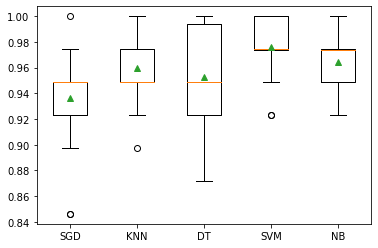

In [32]:

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>SGD 0.943 (0.067)
>KNN 0.932 (0.076)
>DT 0.948 (0.056)
>SVM 0.974 (0.054)
>NB 0.955 (0.066)


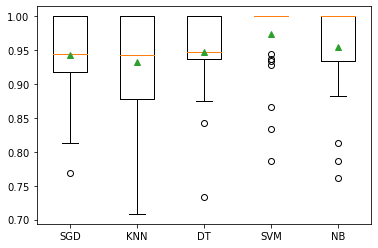

In [33]:
from sklearn.model_selection import RepeatedKFold
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, error_score='raise')
    return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>SGD 0.904 (0.134)
>KNN 0.984 (0.026)
>DT 0.962 (0.036)
>SVM 0.970 (0.036)
>NB 0.969 (0.036)


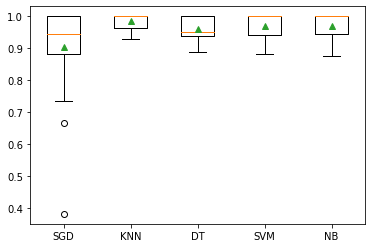

In [35]:
from sklearn.model_selection import RepeatedKFold
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, error_score='raise')
    return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>SGD 0.937 (0.046)
>KNN 0.956 (0.043)
>DT 0.955 (0.035)
>SVM 0.972 (0.038)
>NB 0.961 (0.041)


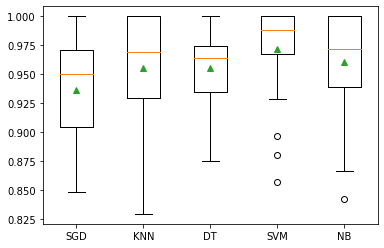

In [36]:
from sklearn.model_selection import RepeatedKFold
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, error_score='raise')
    return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [26]:
# prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib
pipe = make_pipeline(StandardScaler(), GaussianNB())
pipe.fit(X, y)
joblib.dump(pipe, 'model.pkl')
#Prediction
#Loading the saved model with joblib
pipe = joblib.load('model.pkl')

# New data to predict
pr = pd.read_excel(r'ligands2screen.xlsx')
pred_cols = list(pr.columns.values)[:-1]

# apply the whole pipeline to data
pred = pd.Series(pipe.predict(pr[pred_cols]))
print (pred)


ValueError: X has 467 features, but StandardScaler is expecting 20 features as input.